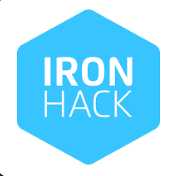

<h1 style="color: saddlebrown;">Final Project</h1>

<h1 style="color: sandybrown;">00 | Data cleaning and preparation </h1>

In [4]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones mathematics
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objs as go

# 🔢 stats
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import kruskal
from scipy.stats import shapiro, normaltest

import scipy.stats as st 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols #Anova eta-2

# 🤖🎓 ML training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 

#⚖️ ML normalizing features
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import category_encoders as ce

# 📐 Ml reporting metrics
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# 🤖 NLP Libraries
import nltk # natural language toolkit
from nltk.sentiment import SentimentIntensityAnalyzer #vader sentiment analysis
import tensorflow as tf #RoBERTa
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification # sequence classification
from nltk import sent_tokenize

In [5]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

nltk.download('vader_lexicon')
tf.keras.losses.SparseCategoricalCrossentropy()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x0000022F410F7880>, kwargs={'from_logits': False, 'ignore_class': None})>

<h1 style="color: sandybrown;">03 | EDA (Exploratory Data Analysis)</h1>

In [7]:
df=pd.read_csv("sephora_cleaned.csv")

In [8]:
df.sample(3)

,rating_x,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_x,brand_name_x,loves_count,rating_y,reviews,variation_type,variation_desc,price_usd_y,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,secondary_category,is_recommended
394143,4,0.600000,5,2,3,I bought this product without reading about it...,not enough cleansing for oily skin,light,brown,oily,blonde,Squalane Cleanser,The Ordinary,121486,4.0068,888.0,Size,no description,9.0,9.0,9.0,0,0,0,0,0,"['Vegan', 'Hydrating', 'Good for: Dryness', 'W...",Cleansers,0.0
164972,4,0.000000,0,0,0,Ever since I received this product I have been...,Is my new staple product!,mediumTan,brown,combination,brown,Confidence in a Cream Anti-Aging Hydrating Moi...,IT Cosmetics,62988,4.6200,2484.0,Size,no description,20.0,20.0,20.0,0,0,0,0,0,"['Vegan', 'Hyaluronic Acid', 'Good for: Loss o...",Moisturizers,1.0
208963,5,0.666667,3,1,2,Leaves your skin super soft and moisture. Best...,Soft Skin,mediumTan,brown,combination,brown,Natural Moisturizing Factors + HA,The Ordinary,258456,4.1472,2052.0,Size,no description,6.5,6.5,6.5,0,0,0,0,0,"['Vegan', 'Community Favorite', 'Without Silic...",Treatments,1.0


<h2 style="color: saddlebrown;">Statistical information about the numerical columns</h2>

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
rating_x,635739.0,4.29,1.18,1.0,4.00,5.00,5.00,5.0
helpfulness,635739.0,0.39,0.44,0.0,0.00,0.00,0.93,1.0
total_feedback_count,635739.0,4.63,24.59,0.0,0.00,1.00,4.00,5464.0
total_neg_feedback_count,635739.0,0.99,5.53,0.0,0.00,0.00,1.00,1159.0
total_pos_feedback_count,635739.0,3.65,21.41,0.0,0.00,0.00,3.00,5050.0
loves_count,635739.0,109104.57,178285.44,0.0,14302.00,44288.00,121486.00,1081315.0
rating_y,635739.0,4.29,0.29,1.0,4.14,4.34,4.50,5.0
reviews,635739.0,2040.85,2532.62,1.0,509.00,1217.00,2554.00,16118.0
price_usd_y,635739.0,50.55,41.69,3.0,26.00,40.00,65.00,1900.0
value_price_usd,635739.0,51.10,42.74,3.0,26.00,40.00,65.00,1900.0


<h2 style="color: saddlebrown;">Selecting numerical</h2>

In [12]:
# General Selection for categorical and numerical data
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] 
cat = pd.concat([cat, cat_from_num], axis=1)
#num = num.drop(columns=cat_from_num.columns)

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

<h2 style="color: saddlebrown;">Checking Distributions</h2>

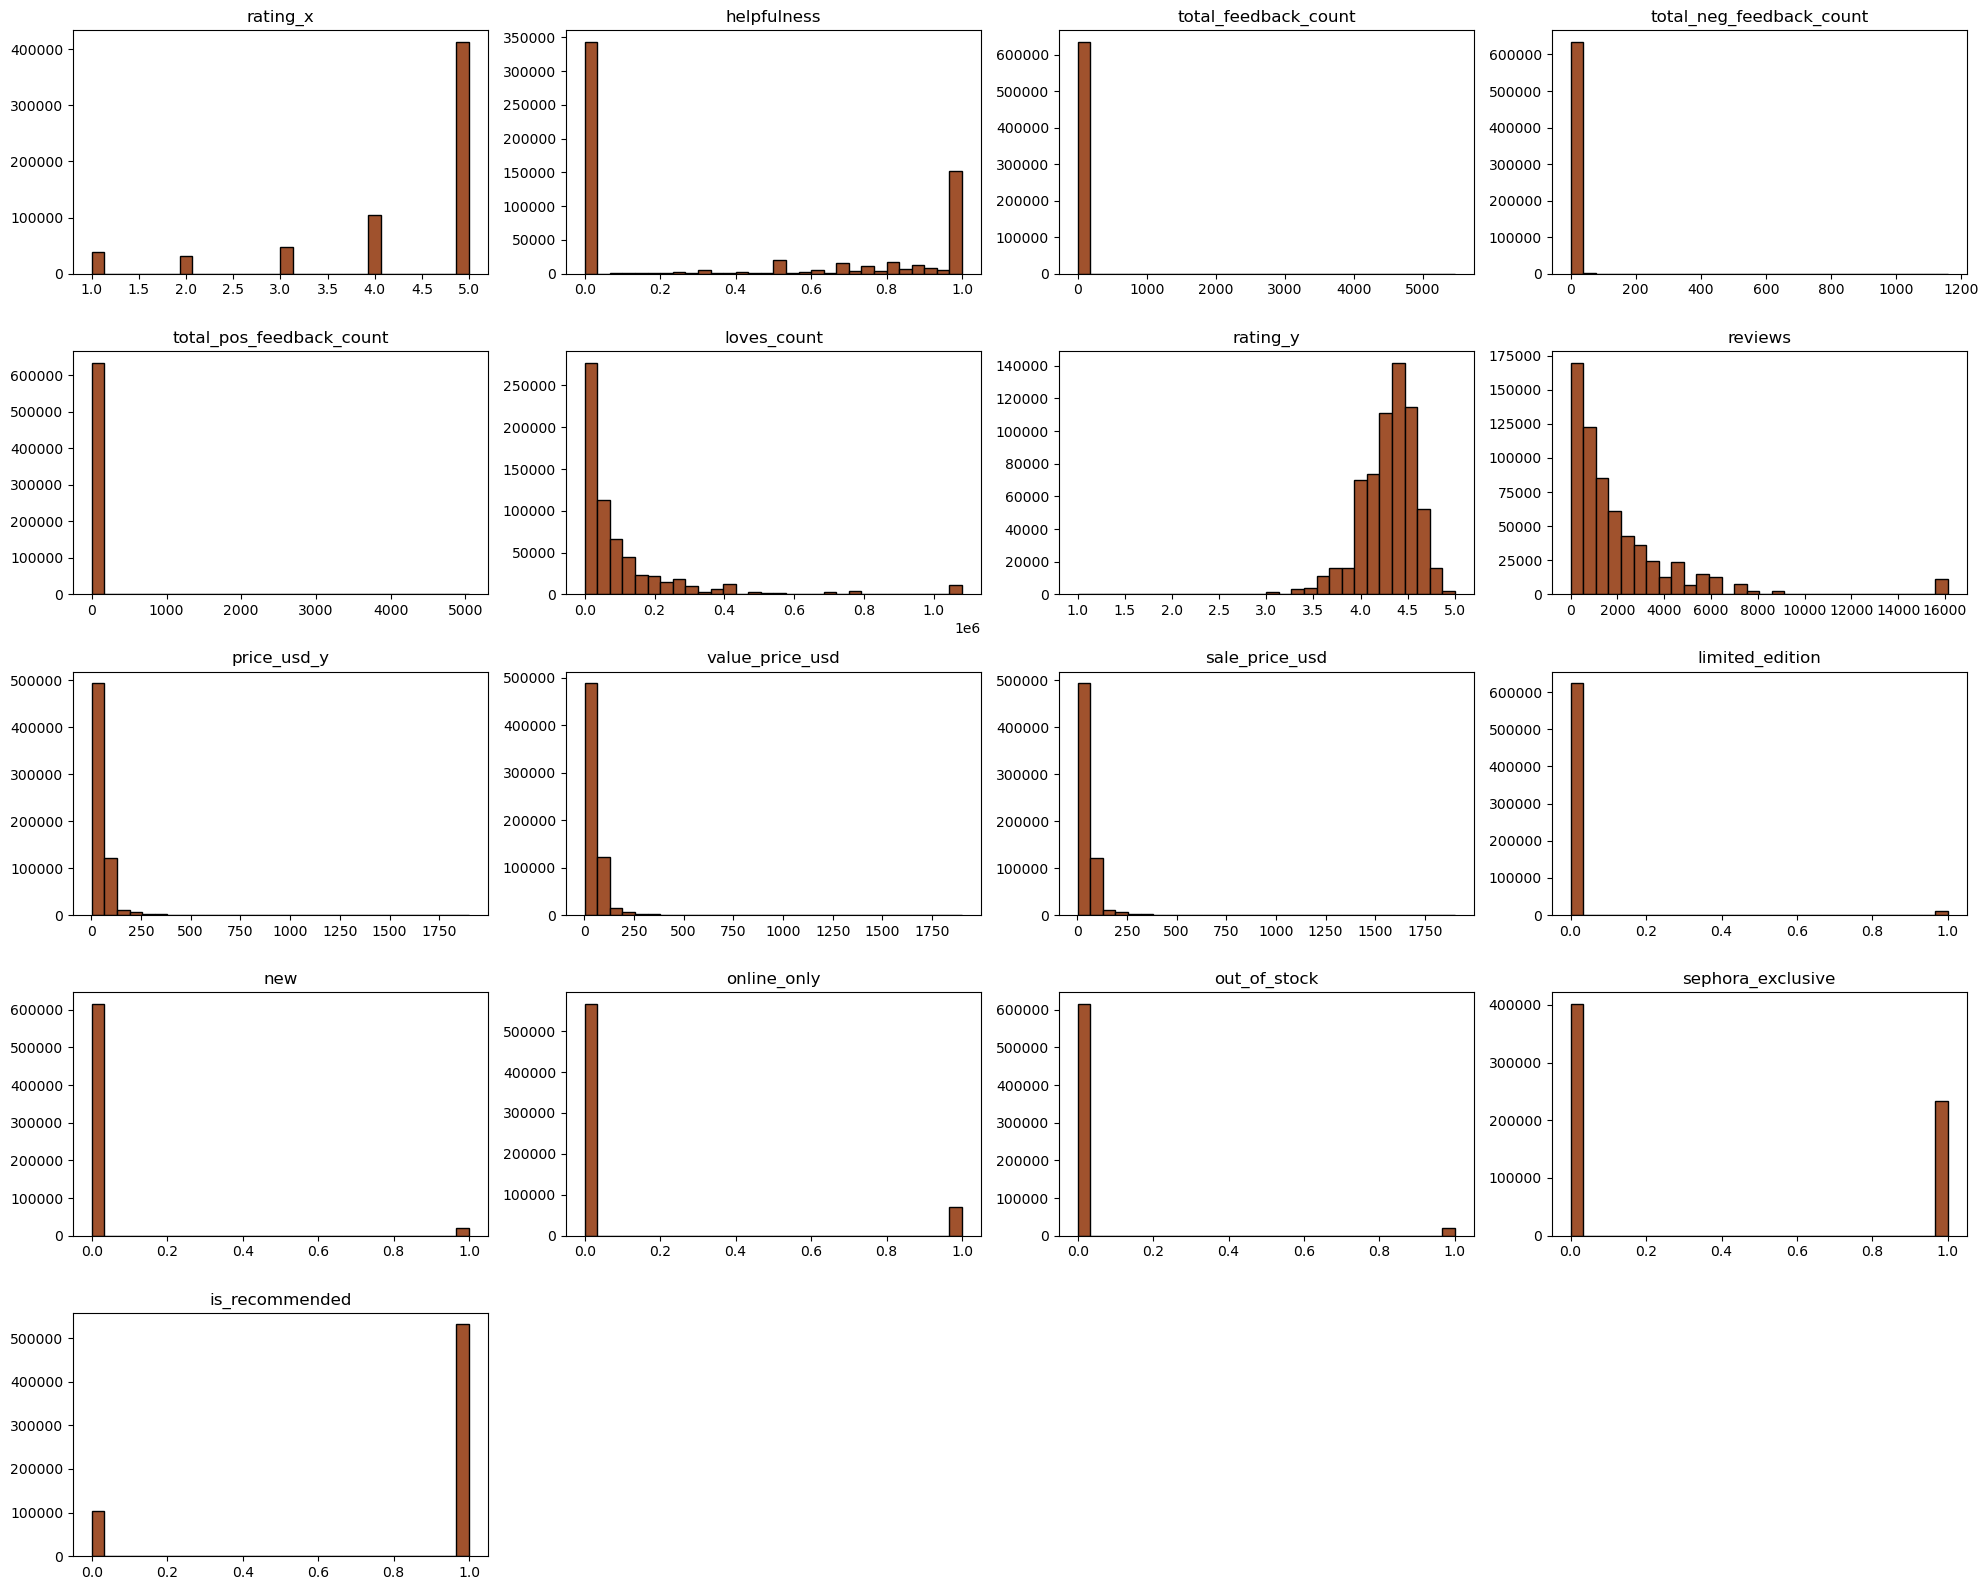

In [14]:
# Filter numeric columns to show the disrtibution on histogram
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(numeric_columns):
        ax.set_visible(False)  # hide unused plots
        continue
    column_name = numeric_columns[i]
    ax.hist(df[column_name].dropna(), bins=30, color='sienna', edgecolor='black')  # drop NaNs
    ax.set_title(column_name)

plt.tight_layout()
plt.show()

<h2 style="color: saddlebrown;">Checking Outliers</h2>

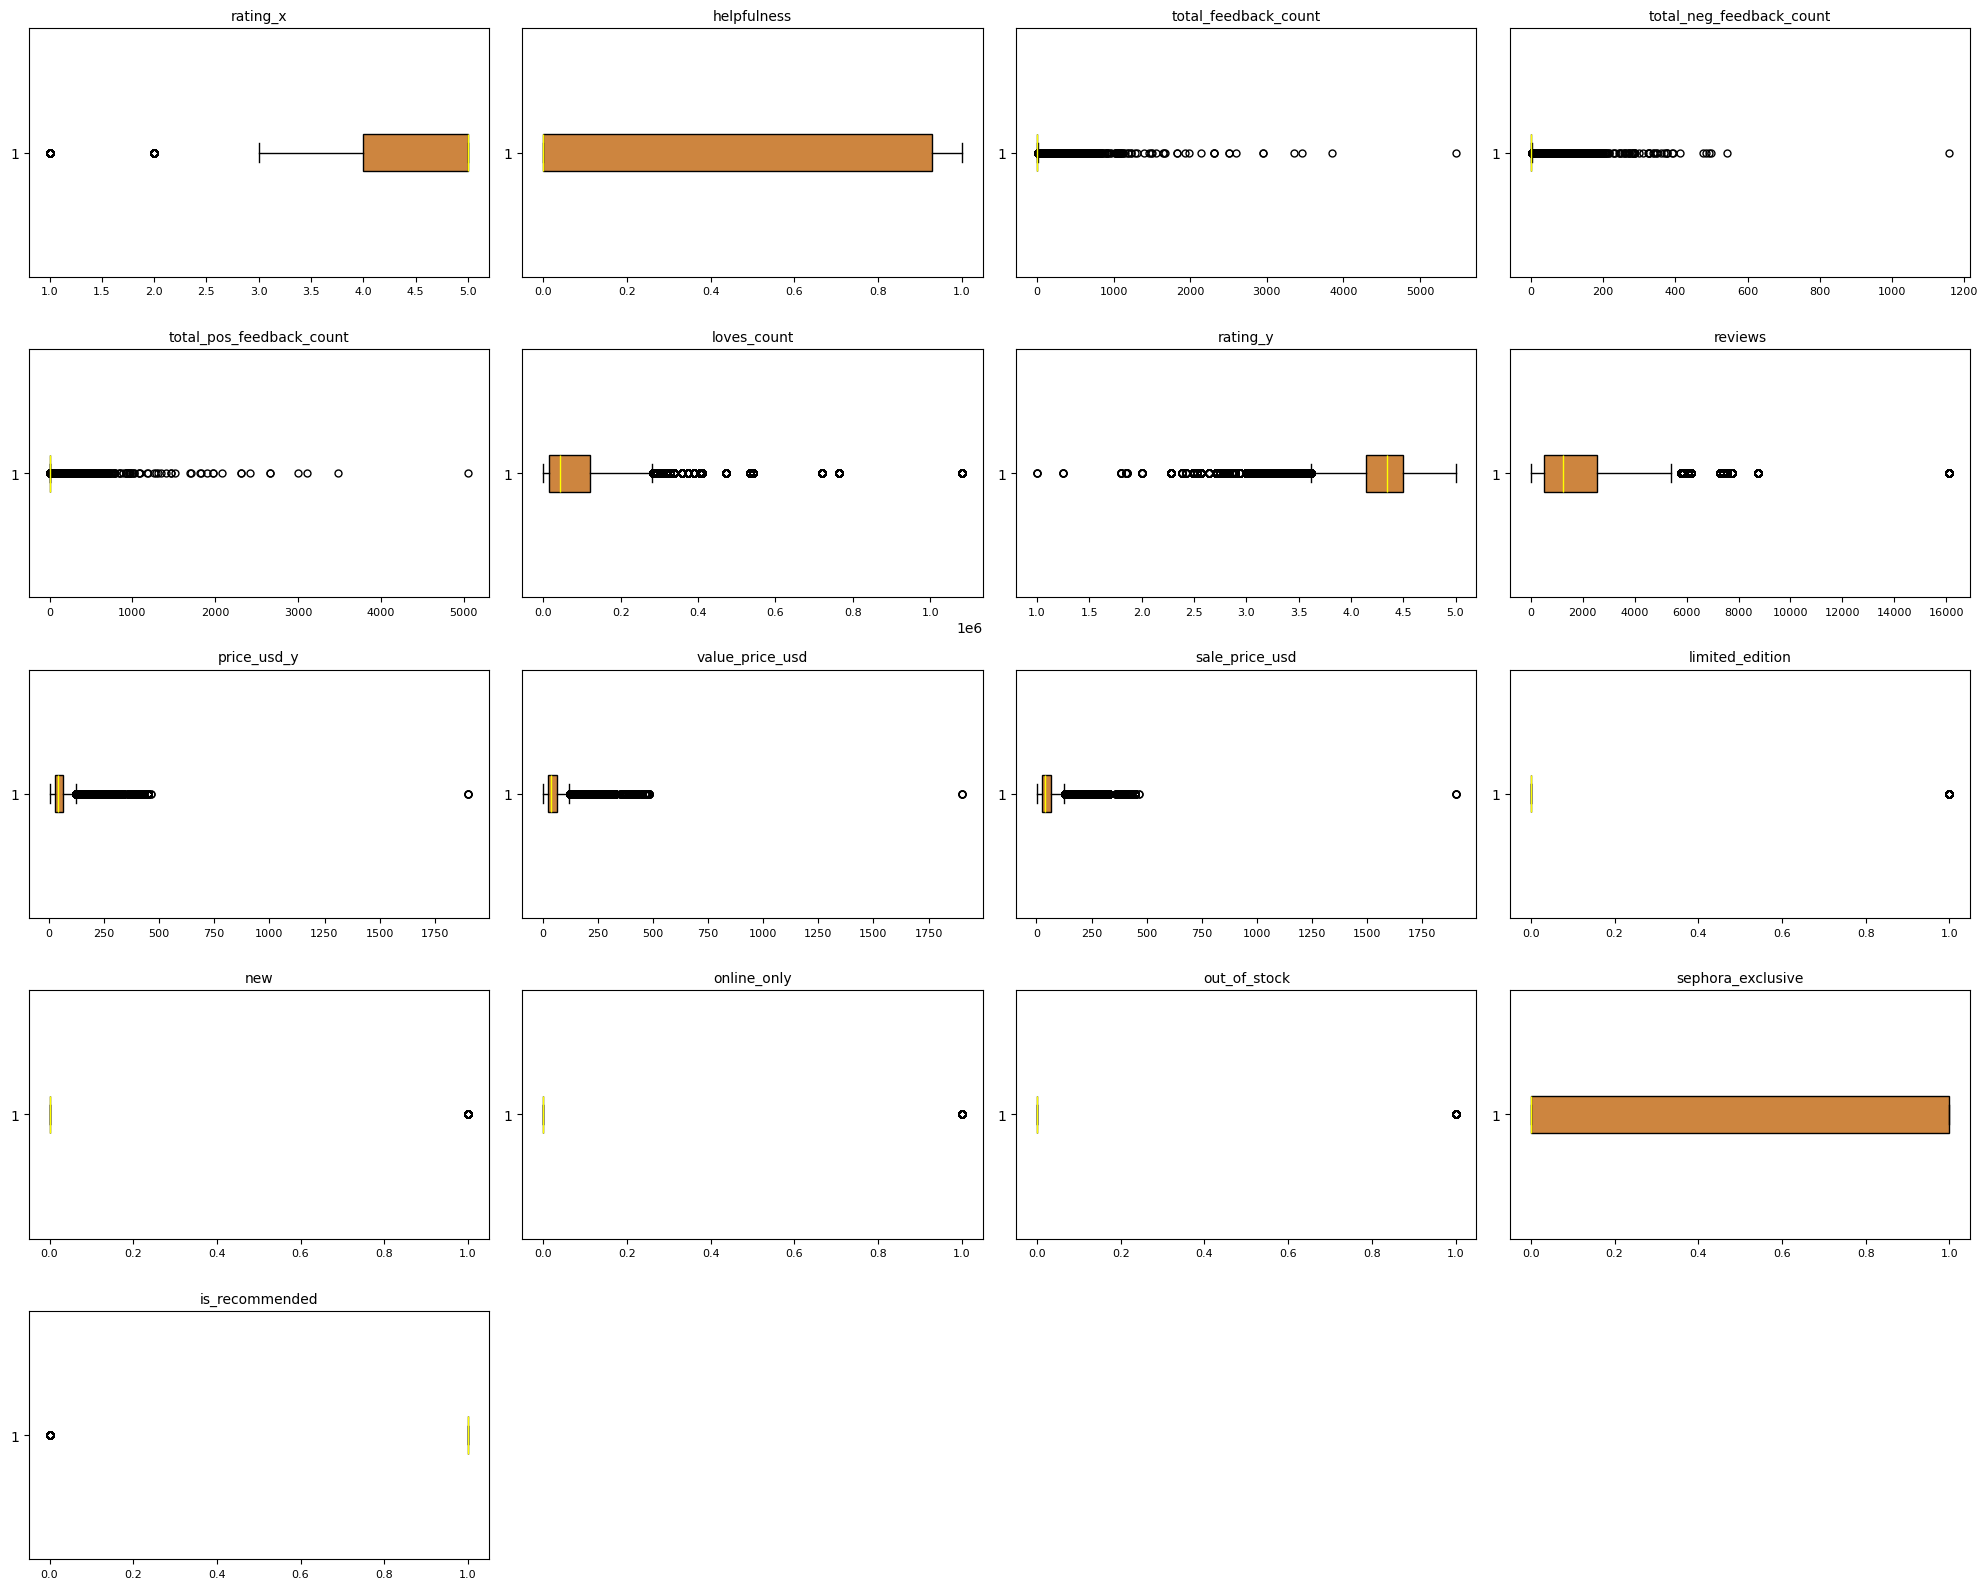

In [16]:
color = 'peru'
# Grid size
nrows, ncols = 5, 4  # adjust based on the number of numeric columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot each numeric column
for i, ax in enumerate(axes):
    if i >= len(numeric_columns):  
        ax.set_visible(False)
        continue
    column_name = numeric_columns[i]
    ax.boxplot(df[column_name].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(column_name, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [17]:
# Dealing with outliers
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [18]:
df_no_outliers = outlier_slayer(df)

As the analysis would be more benefitial to capture all data, havent dropped the outliers from dataframe

<h2 style="color: saddlebrown;">Looking for Correlations</h2>

In [21]:
# making sure is_recommended is numeric and no nan values
df['is_recommended'] = pd.to_numeric(df['is_recommended'], errors='coerce')
df.dropna(subset=['is_recommended'], inplace=True)

In [22]:
# checking the correlation of is_recommended with all variables
num.corr()["is_recommended"].sort_values(ascending=False)

is_recommended              1.000000
rating_x                    0.857239
rating_y                    0.228599
new                         0.033831
price_usd_y                 0.022045
sale_price_usd              0.021917
value_price_usd             0.021664
online_only                 0.018339
limited_edition            -0.000662
out_of_stock               -0.005849
reviews                    -0.009432
sephora_exclusive          -0.014449
loves_count                -0.026691
total_pos_feedback_count   -0.056233
total_feedback_count       -0.086377
helpfulness                -0.126264
total_neg_feedback_count   -0.166236
Name: is_recommended, dtype: float64

Variables like `rating_x` have strong positive correlations with is_recommended and `rating_y` and moderate positive correlation suggesting that as these variables increase, the recommendation is positive.
While `total_neg_feedback_count` and `helpfulness `have moderate negative correlations with is_recommended. 

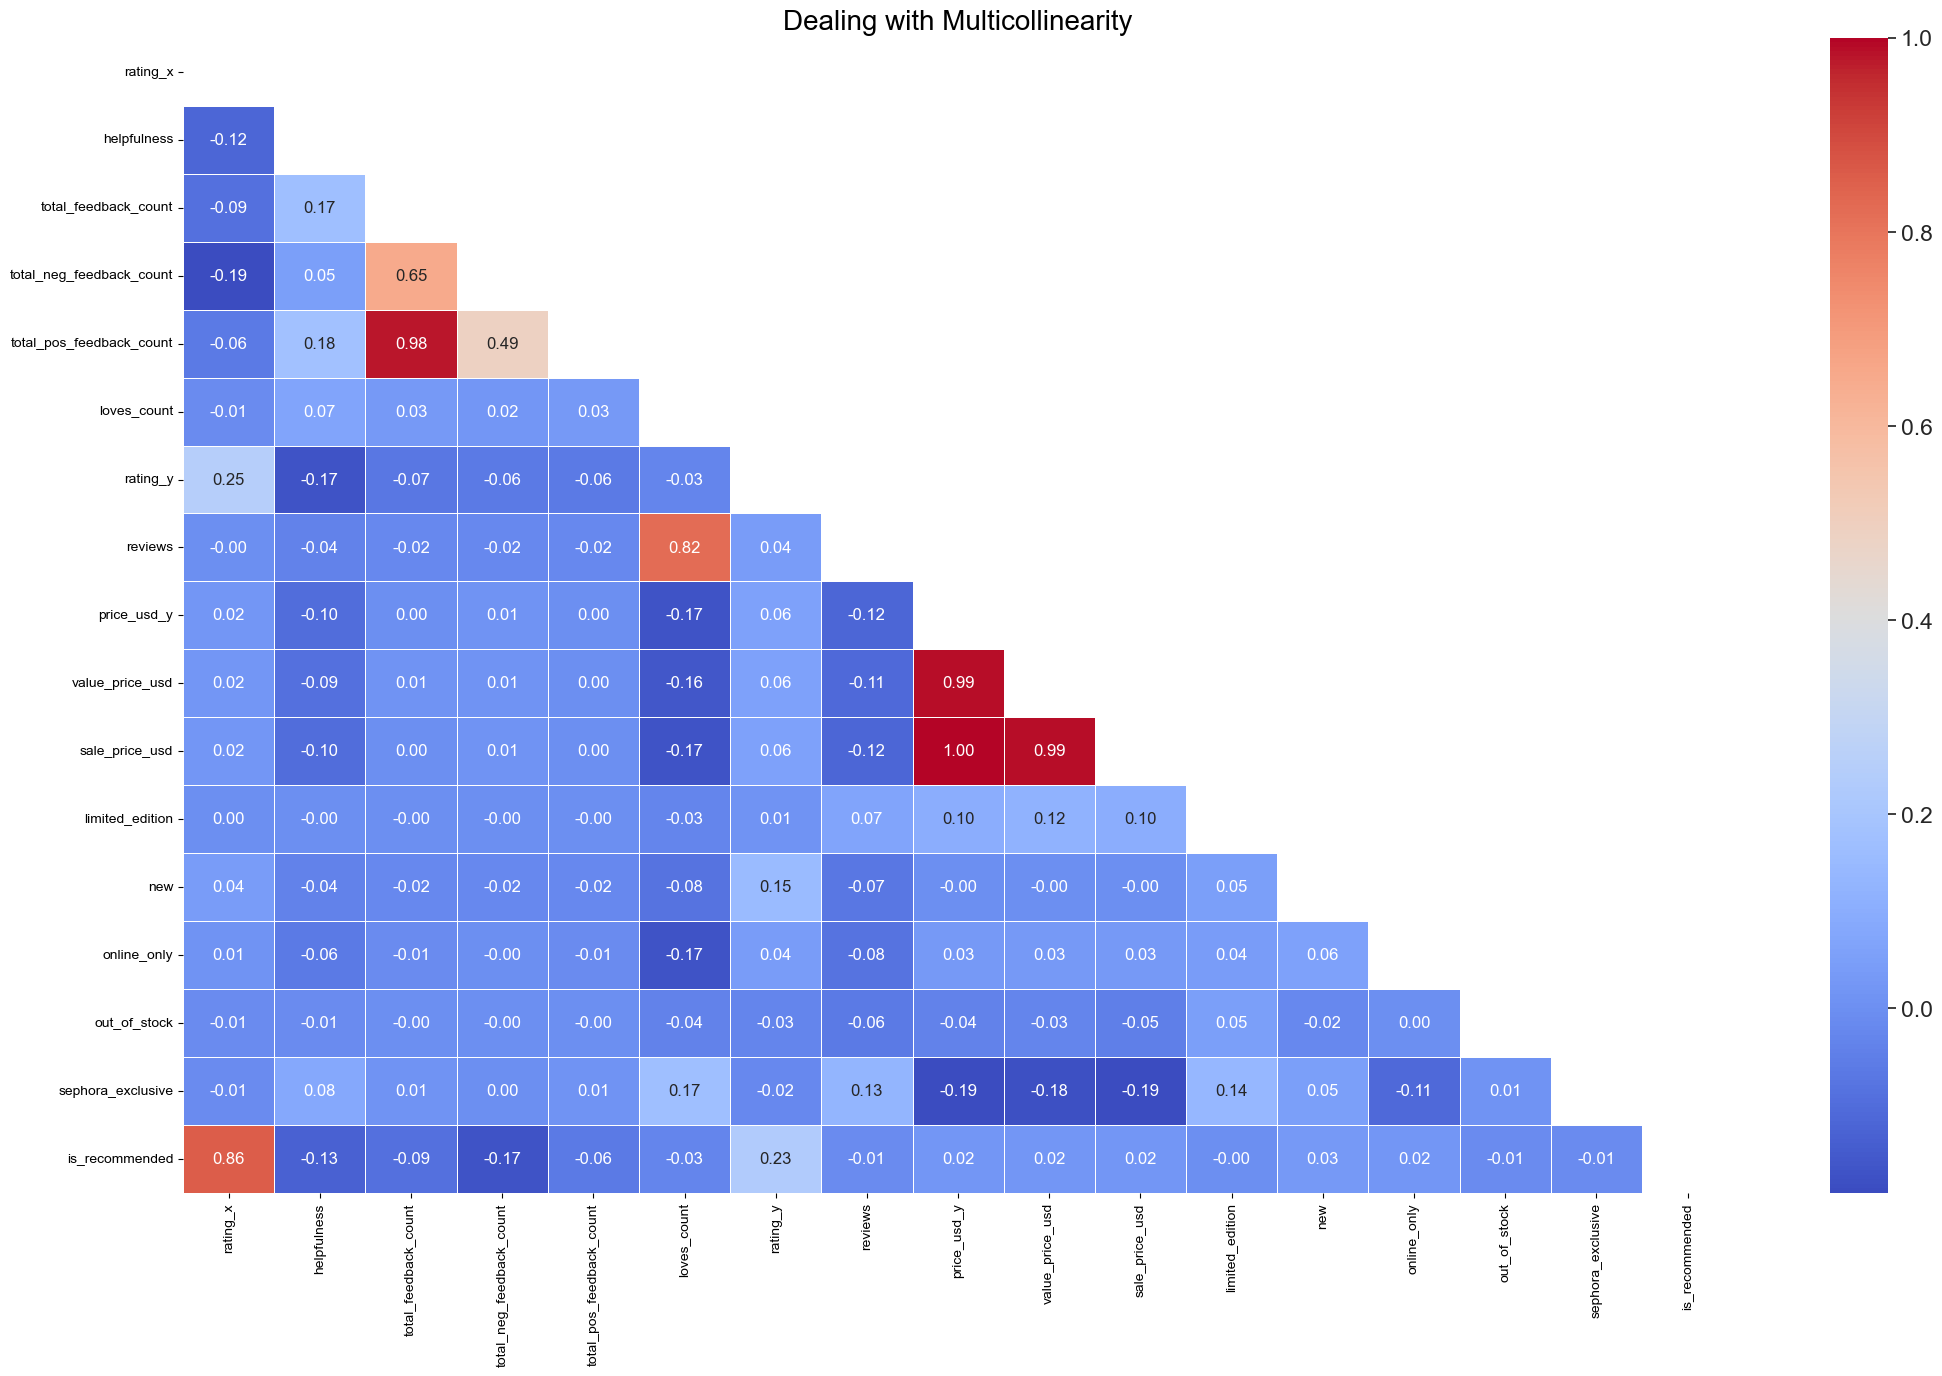

In [24]:
#Create heatmap or Correlation matrix
num_corr = num.corr().round(2)

# Create the mask and plot heatmap
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True  # to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)  # Increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12},
                 linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) 
plt.show()

<h3 style="color: saddlebrown;">Distribution of is_recommended</h3>

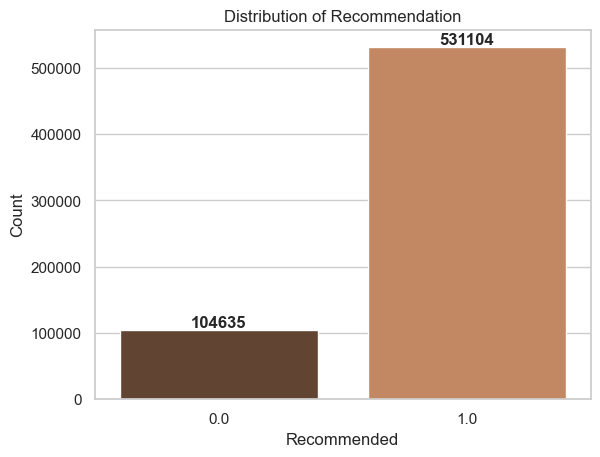

In [26]:
sns.set(style='whitegrid', palette='Set2')
ax = sns.countplot(data=df, x="is_recommended", palette="copper")
for p in ax.patches: # Add the values on top of the bars
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.title("Distribution of Recommendation")
plt.show()

<h3 style="color: saddlebrown;">Scattered plot Original price and Discount price</h3>

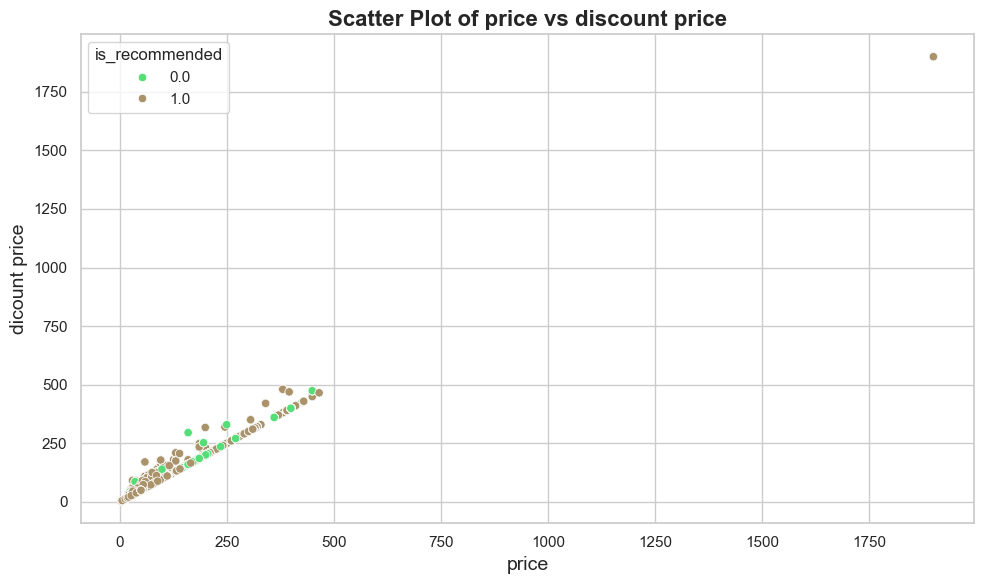

In [28]:
#Scattered plot for original price (prise_usd_y) and Disocunt price (value_price_usd)
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x="price_usd_y",
    y="value_price_usd",
    hue="is_recommended",
    data=df,
    palette="terrain"
)

plt.title("Scatter Plot of price vs discount price", fontsize=16, fontweight='bold')
plt.xlabel("price", fontsize=14)
plt.ylabel("dicount price", fontsize=14)

plt.tight_layout()
plt.show()

<h2 style="color: saddlebrown;">Statistical Tests - Chi square</h2>

<h3 style="color: saddlebrown;">Hypothesis 0</h3>

**Null hypothesis (H0):** There is no significant association between is_recommended and skin_tone.

**Alternative hypothesis (H1):** There is significant association between is_recommended and skin_tone.

In [32]:
#Here is-recommended is considered as a categorical variable as there is few unique values
#Total number of entries for recommendation per skin_tone
group_skintone = df.groupby('skin_tone')['is_recommended'].count().sort_values(ascending=False)

In [33]:
#create contingency table to count each 0 and 1 value of is_recommended
crosstab_analysis = pd.crosstab(df['is_recommended'], df['skin_tone']).T
crosstab_analysis = crosstab_analysis.sort_values(by=1, ascending=False)  # sort by is_recommended = 1
crosstab_analysis

is_recommended,0.0,1.0
skin_tone,,
light,33104,167324
fair,23622,112948
lightMedium,20219,108265
medium,7001,40410
mediumTan,6868,33830
fairLight,7046,32063
tan,3562,18817
deep,2244,12060
rich,532,3379


In [34]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.50f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between skin_tone and is_recommended.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between skin_tone and is_recommended.")

chi2_pvalue: 0.00000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between skin_tone and is_recommended.


In [35]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.02
The effect size is small.


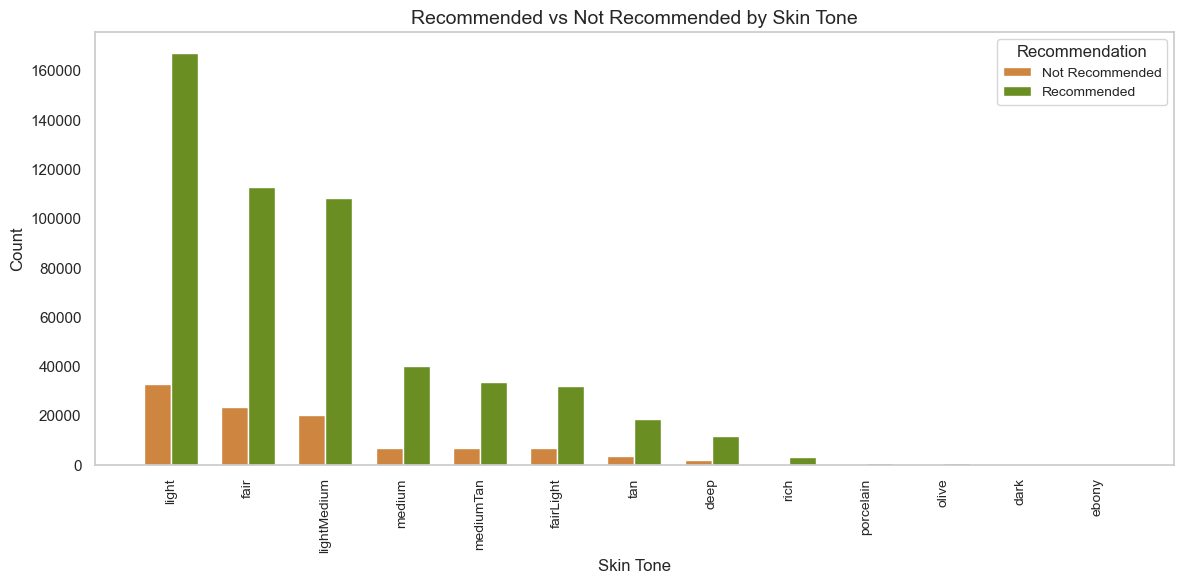

In [36]:
# Extract skin tones and recommendation counts
skin_tones = crosstab_analysis.index
not_recommended = crosstab_analysis[0]  # Count of not recommended (0)
recommended = crosstab_analysis[1]  # Count of recommended (1)

# Bar width and positions
bar_width = 0.35
x = np.arange(len(skin_tones))

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for Not recommended
ax.bar(x - bar_width/2, not_recommended, width=bar_width, label='Not Recommended', color='peru')

# Plot for Recommended
ax.bar(x + bar_width/2, recommended, width=bar_width, label='Recommended', color='olivedrab')

# Customization
plt.title('Recommended vs Not Recommended by Skin Tone', fontsize=14)
plt.xlabel('Skin Tone', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x, skin_tones, rotation=90, fontsize=10)  # Rotate for readability
plt.legend(title='Recommendation', fontsize=10)
plt.tight_layout()
plt.grid(False)

# Show plot
plt.show()

<h3 style="color: saddlebrown;">Hypothesis 1</h3>


**Null hypothesis (H0):** There is no significant association between secondary_category and skin_tone.

**Alternative hypothesis (H1):** There is significant association between secondary_categroy and skin_tone.

In [39]:
#Total number of entries for recommendation per secondry category
group_category = df.groupby('secondary_category')['skin_tone'].count().sort_values(ascending=False)

In [40]:
#create contingency table to count each 0 and 1 value of recommendation
crosstab_analysis = pd.crosstab(df['skin_tone'], df['secondary_category']).T
crosstab_analysis["Total"] = crosstab_analysis.sum(axis=1)  # add a total count column
crosstab_analysis = crosstab_analysis.sort_values(by="Total", ascending=False)
crosstab_analysis = crosstab_analysis.drop(columns=["Total"])  # drop the extra column after sorting

In [41]:
#chi squared test
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.70f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between skin_tone and category.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between skin_tone and category.")

chi2_pvalue: 0.0000000000000000000000000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between skin_tone and category.


In [42]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.02
The effect size is small.


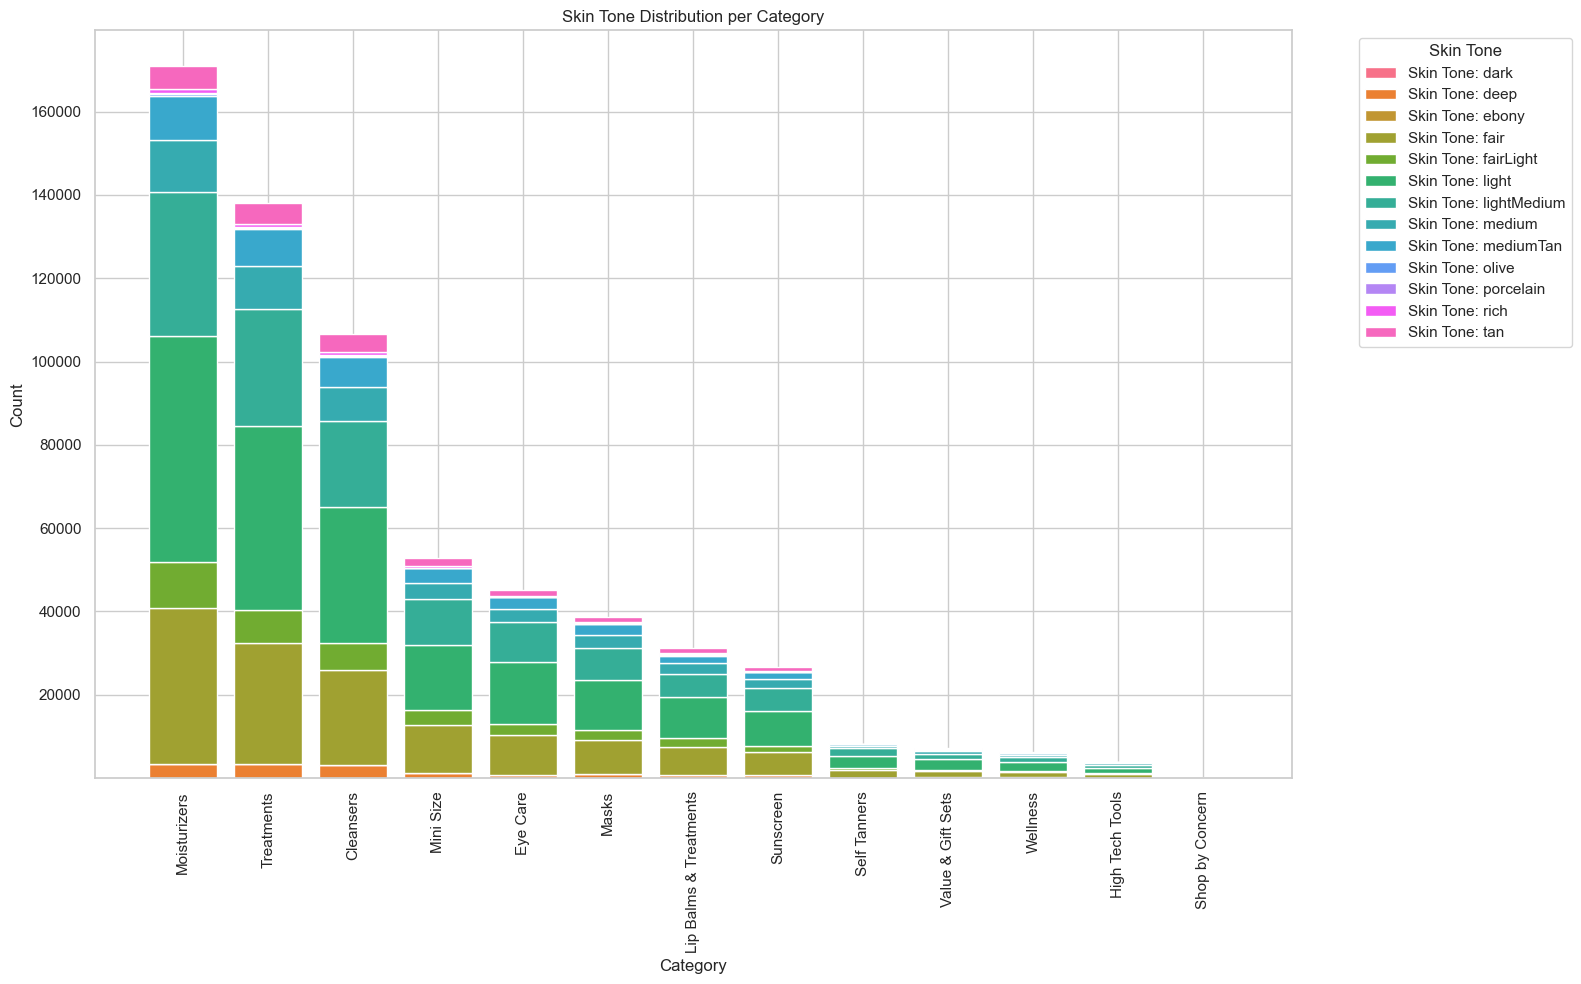

In [43]:
# Define categories and skin tones
categories = crosstab_analysis.index
skin_tones = crosstab_analysis.columns
values = crosstab_analysis.T  # Transpose for stacking

# Generate unique colors for each skin tone using Seaborn palette
palette = sns.color_palette("husl", len(skin_tones))  # "husl" gives distinct colors

# Create plot
fig, ax = plt.subplots(figsize=(16, 10))
bottom = np.zeros(len(categories))

# Plot stacked bars for each skin tone 
for i, tone in enumerate(skin_tones):
    ax.bar(categories, values.loc[tone], label=f'Skin Tone: {tone}', bottom=bottom, color=palette[i])
    bottom += values.loc[tone].values

plt.title("Skin Tone Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)  
plt.legend(title="Skin Tone", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

<h3 style="color: saddlebrown;">Hypothesis 2</h3>

**Null hypothesis (H0):** There is no significant association between is recommended and brand name.

**Alternative hypothesis (H1):** There is significant association between is recommended and brand name.

In [46]:
#Total number of entries for recommendation per skin_tone
group_brand_name = df.groupby('brand_name_x')['is_recommended'].count().sort_values(ascending=False)

In [47]:
#create contingency table to count each 0 and 1 value of is_recommended
crosstab_analysis = pd.crosstab(df['is_recommended'], df['brand_name_x']).T
crosstab_analysis = crosstab_analysis.sort_values(by=1, ascending=False)  # sort by recommended = 1
crosstab_analysis

is_recommended,0.0,1.0
brand_name_x,,
Tatcha,5811,24193
Drunk Elephant,6599,20804
The Ordinary,4553,20125
Glow Recipe,3526,18067
fresh,2788,16590
...,...,...
Soleil Toujours,4,24
caliray,1,19
Anastasia Beverly Hills,3,18


In [48]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.50f}")

# Interpret the p-value
alpha = 0.05
if chi2_pvalue < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between Brand name and is_recommended.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between Brand name and is_recommended.")

chi2_pvalue: 0.00000000000000000000000000000000000000000000000000
Reject the null hypothesis (H0): There is a significant association between Brand name and is_recommended.


In [49]:
#association strength with Cramer's V
Cramer_V_amount=association(crosstab_analysis, method='cramer')

# Cramer's V
print(f"Cramer's V: {Cramer_V_amount:.2f}")

# Interpret Cremar's V
if abs(Cramer_V_amount) < 0.2:
    print("The effect size is small.")
elif abs(Cramer_V_amount) < 0.4:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cramer's V: 0.13
The effect size is small.


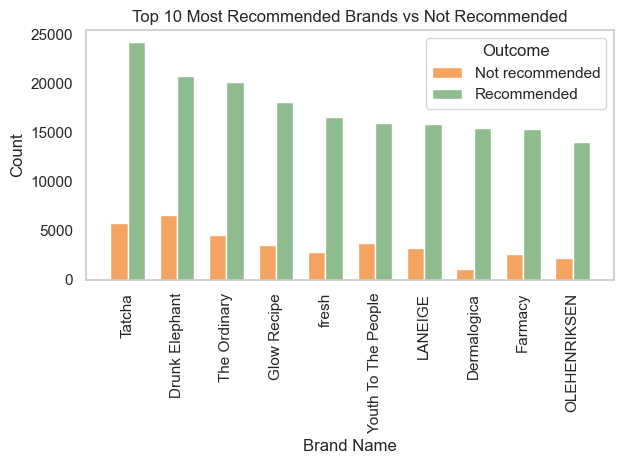

In [50]:
# Filter contingency table for rows where the count of recommended 1 is greater than 10
filtered_crosstab = crosstab_analysis.loc[crosstab_analysis[1] > 10]
# Sort the filtered table
filtered_sorted_crosstab = filtered_crosstab.sort_values(by=1, ascending=False).head(10)

# Plotting Recommended and Not Recommended
brand_name = filtered_sorted_crosstab.index
not_recommended = filtered_sorted_crosstab[0]
recommended = filtered_sorted_crosstab[1]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(brand_name))

# Plot bars for "Not recommended"
plt.bar(x - bar_width/2, not_recommended, width=bar_width, label='Not recommended', color='sandybrown')

# Plot bars for "Recommended"
plt.bar(x + bar_width/2, recommended, width=bar_width, label='Recommended', color='darkseagreen')

plt.title('Top 10 Most Recommended Brands vs Not Recommended')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(x, brand_name, rotation=90)
plt.legend(title='Outcome')
plt.tight_layout()
plt.grid(False)
plt.show()

<h2 style="color: saddlebrown;"> Statistical Test - T_test</h2>

<h3 style="color: saddlebrown;">Hypothesis 3</h3>

**Null hypothesis (H0):** The mean of original usd price is equal to the value price (discount price).

**Alternative hypothesis (H1):** The mean of original usd price is not equal to the value price (discount price).

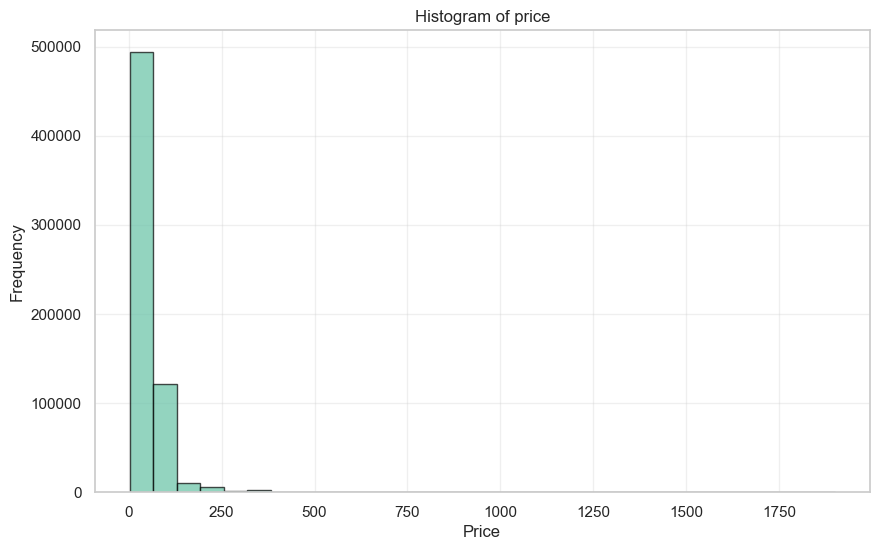

In [54]:
#checking distribution for the variables to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price_usd_y'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show() 

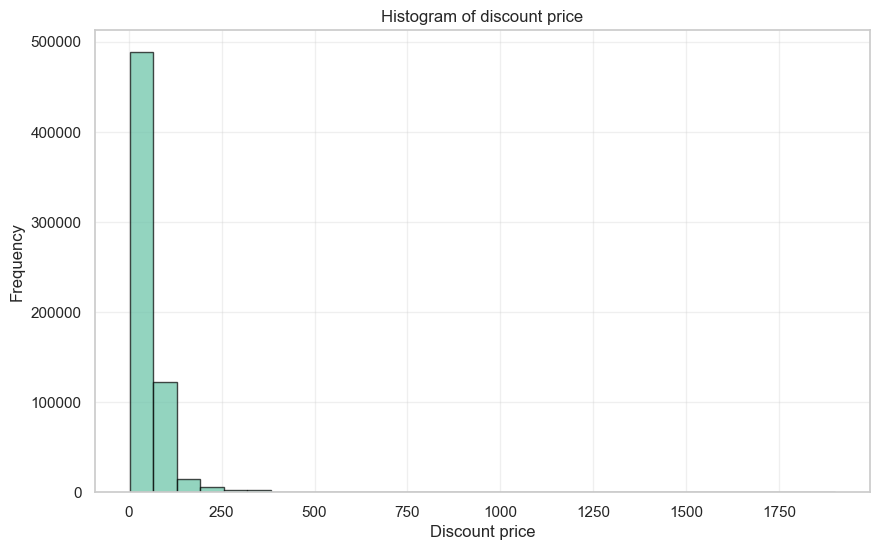

In [55]:
#checking distribution for the variables to select the parameter or non-parameter tests
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(df['value_price_usd'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of discount price")
plt.xlabel("Discount price")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show() 

In [56]:
# Define the paired samples
value_price_usd = df['value_price_usd']
price_usd = df['price_usd_y']

# Perform the Wilcoxon Signed-Rank Test for non parametric distibution, two sided t test 
statistic, p_value = stats.wilcoxon(value_price_usd, price_usd, alternative='two-sided')

# results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.2f}")
print(f"P-Value: {p_value:.60f}")
print()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference between the paired samples of price and value price.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference between the paired samples of price and value price.")

Wilcoxon Signed-Rank Test Statistic: 0.00
P-Value: 0.000000000000000000000000000000000000000000000000000000000000

Reject the null hypothesis (H0): There is a significant difference between the paired samples of price and value price.


In [57]:
mean_diff = df["price_usd_y"].mean() - df["value_price_usd"].mean()
print(f"Mean Difference: {mean_diff}")


Mean Difference: -0.5440658351933791


Explanation of Wilcoxon Signed-Rank Test statistic: P_value is 0.00, which suggests that the differences between paired samples (price_usd_y and value_price_usd) are all in the same direction (positive or negative). 
It means sum of the ranks for the smaller group is 0, leading to a test statistic of 0.00. 
Another possible reason for that large dataset, the Wilcoxon test might return extremely small values when differences are consistent

### Effect size
Calculting Cohen's d is as measure of effect size that indicates the standardized difference between two means to quantifies the magnitude of the effect

In [60]:
# Calculate the differences
differences_price = price_usd - value_price_usd

# Calculate Cohen's d
mean_diff_price = differences_price.mean()
std_diff_price = differences_price.std(ddof=1)  #'ddof=1' for sample std
cohens_d_price = mean_diff_price / std_diff_price

# Cohen's d
print(f"Cohen's d: {cohens_d_price:.2f}")

# Interpret Cohen's d
if abs(cohens_d_price) < 0.2:
    print("The effect size is small.")
elif abs(cohens_d_price) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cohen's d: -0.12
The effect size is small.


In [61]:
correlation_amount = df[['price_usd_y', 'value_price_usd']].corr(method='pearson')
correlation_amount

,price_usd_y,value_price_usd
price_usd_y,1.000000,0.994249
value_price_usd,0.994249,1.000000


The Pearson correlation of (0.994249) suggests a strong positive linear relationship between the original price and value price. As the value price increases, the original price tends to increase as well. 

In [63]:
spearman_correlation_amount = df[['price_usd_y', 'value_price_usd']].corr(method='spearman')
spearman_correlation_amount

,price_usd_y,value_price_usd
price_usd_y,1.000000,0.997983
value_price_usd,0.997983,1.000000


The Spearman correlation of (0.997983) indicates a strong positive monotonic relationship between original price and value price. This means that when one variable increases, the other also tends to increase, but not necessarily at a constant rate.

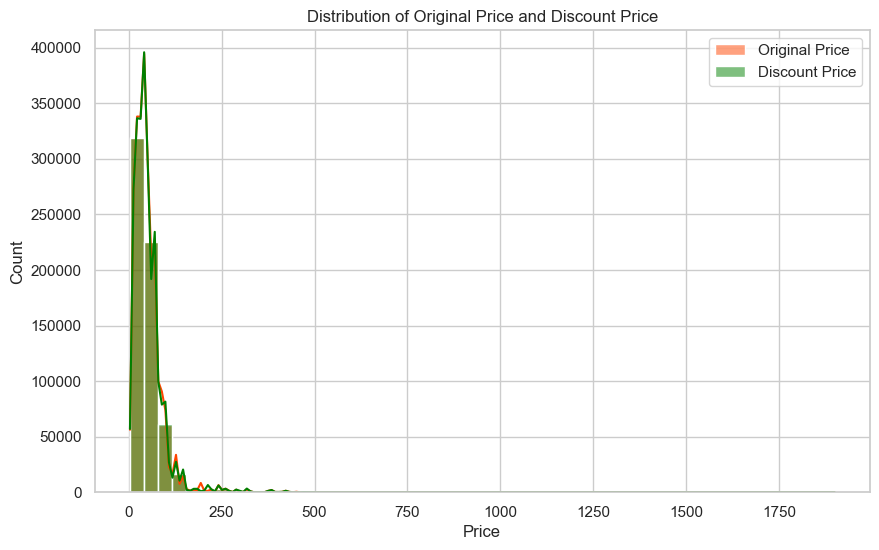

In [65]:
# Plot the distributions original price and discount price
plt.figure(figsize=(10, 6))  
sns.histplot(df["price_usd_y"], color="orangered", bins=50, kde=True, label='Original Price', alpha=0.5)
sns.histplot(df["value_price_usd"], color="green", bins=50, kde=True, label='Discount Price', alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Original Price and Discount Price")
plt.legend() 
plt.show()

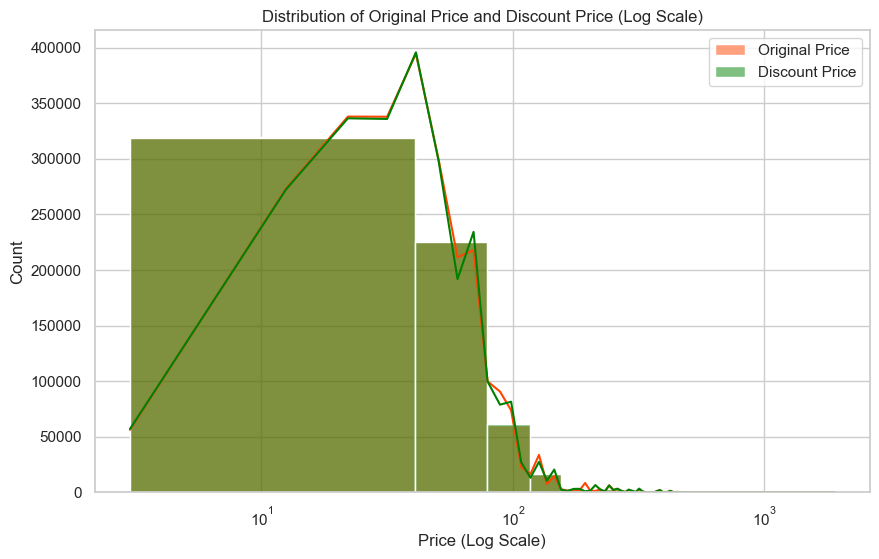

In [66]:
# Plot distribution on a log scale (as Wilcoxon does not consider scale and it calculates absolute difference). 
plt.figure(figsize=(10, 6))
sns.histplot(df["price_usd_y"], color="orangered", bins=50, kde=True, label="Original Price", alpha=0.5)
sns.histplot(df["value_price_usd"], color="green", bins=50, kde=True, label="Discount Price", alpha=0.5)
plt.xscale("log")  # Use log scale to see details in the lower range
plt.xlabel("Price (Log Scale)")
plt.ylabel("Count")
plt.title("Distribution of Original Price and Discount Price (Log Scale)")
plt.legend()
plt.show()

Although the result from Wilcoxon Signed-Rank test statistic shows small p value and statistically significant difference (rank of the prices are consistanly different), the log scale does not show much difference. 
Calculated mean difference between 2 variables, -0.54 is insiginifcant, thus there is not a meaningful difference between prices. 

<h2 style="color: saddlebrown;">Statistical Test - Anova </h2>

<h3 style="color: saddlebrown;">Hypothesis 4 </h3>

**Null hypothesis (H0):** The mean rating is the same across all category.

**Alternative hypothesis (H1):** At least one category has a significantly different mean rating.

In [71]:
# Perform shapiro test to check if rating_y is normally distributed or not to choose Anova one way or Kruskal-Wallis
# Shapiro-Wilk Test
stat, p = shapiro(df['rating_y'])
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-value: {p:.6f}")

# Interpretation
if p > 0.05:
    print("Fail to reject null hypothesis: rating_y is normally distributed.")
else:
    print("Reject null hypothesis: rating_y is NOT normally distributed.")

Shapiro-Wilk Test Statistic: 0.9394, P-value: 0.000000
Reject null hypothesis: rating_y is NOT normally distributed.


In [72]:
# Extract unique categories
categories = df["secondary_category"].unique()

# Create groups for Kruskal-Wallis test (rating_x values for each category)
groups = [df[df["secondary_category"] == cat]["rating_y"] for cat in categories]

# Perform Kruskal-Wallis test
stat, p = kruskal(*groups)

# P value results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.20f}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: At least one category has a significantly different median rating_y.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rating_x across categories.")

Kruskal-Wallis Test Statistic: 15381.3321
P-value: 0.00000000000000000000
Reject the null hypothesis: At least one category has a significantly different median rating_y.


#### Effect size

In [74]:
# Calculate effect size for Anova test using Ordinary Least Square (Eta Squared)
# Use OLS to fit Anova
model = ols('rating_y ~ C(secondary_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta Squared
SSB = anova_table['sum_sq'][0]  # Sum of Squares Between Groups
SST = sum(anova_table['sum_sq'])  # Total Sum of Squares
eta_squared = SSB / SST

print(f"Eta Squared (η²): {eta_squared:.4f}")

# Interpret Eta Squared
if eta_squared < 0.01:
    print("The effect size is small.")
elif eta_squared < 0.06:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Eta Squared (η²): 0.0296
The effect size is medium.


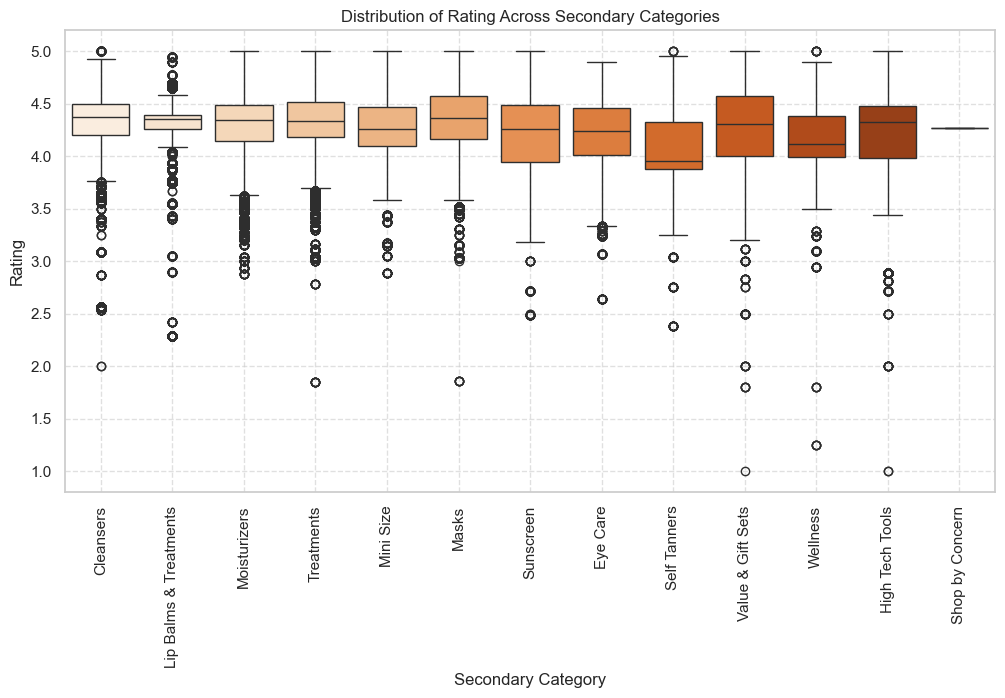

In [75]:
# Create boxplot to visualize rating_y distribution across secondary_category
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["secondary_category"], y=df["rating_y"], palette="Oranges")
plt.title("Distribution of Rating Across Secondary Categories")
plt.xlabel("Secondary Category")
plt.ylabel("Rating")
plt.xticks(rotation=90)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Median line is different among at least categories:

self tanner and cleaner

lipbalm and sunscreen 

wellness and moisturizers

<h3 style="color: saddlebrown;">Hypothesis 5</h3>

**Null hypothesis (H0):** The mean price is the same across all skin types.

**Alternative hypothesis (H1):** At least one skin type has a significantly different mean price.

In [79]:
# Extract unique skin types
skin_types = df["skin_type"].unique()

# Create groups for Kruskal-Wallis test
groups = [df[df["skin_type"] == skin]["price_usd_y"] for skin in skin_types]

# Perform Kruskal-Wallis test
stat, p = kruskal(*groups)

# Anova results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.6f}")

# Interpret p value
if p < 0.05:
    print("Reject the null hypothesis: At least one skin type has a significantly different mean price.")
else:
    print("Fail to reject the null hypothesis: No significant difference in price across skin types.")

Kruskal-Wallis Test Statistic: 705.7546
P-value: 0.000000
Reject the null hypothesis: At least one skin type has a significantly different mean price.


#### Effect size 

In [81]:
# Calculate effect size for Anova test using Ordinary Least Square (Eta Squared)
# Use OLS to fit Anova
model = ols('rating_y ~ C(secondary_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta Squared
SSB = anova_table['sum_sq'][0]  # Sum of square between groups
SST = sum(anova_table['sum_sq'])  # Total sum squares
eta_squared = SSB / SST

print(f"Eta Squared (η²): {eta_squared:.4f}")

# Interpret Eta Squared
if eta_squared < 0.01:
    print("The effect size is small.")
elif eta_squared < 0.06:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Eta Squared (η²): 0.0296
The effect size is medium.


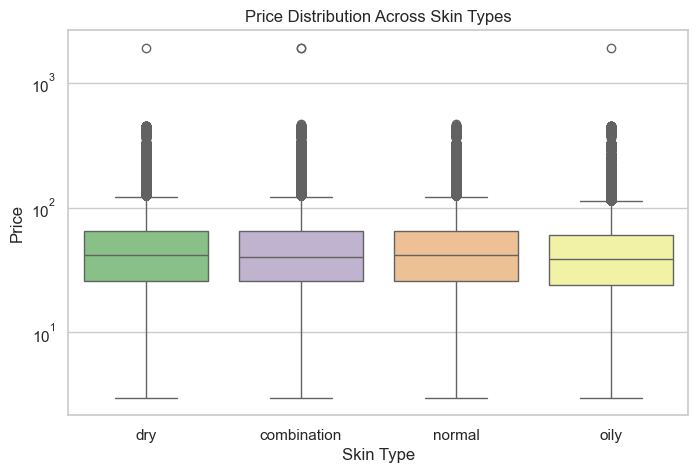

In [82]:
# Visualize price distribution across skin types
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["skin_type"], y=df["price_usd_y"], palette="Accent")  # Using a color palette
plt.title("Price Distribution Across Skin Types")
plt.xlabel("Skin Type")
plt.ylabel("Price")
plt.yscale("log")  # Use log scale for highly skewed prices
plt.show()